# Study of the asymptotic law of MMD2l

In [53]:
Ker = {}
Ker['gaussian'] = gaussian
Ker['laplacian'] = laplacian
dataset = pd.DataFrame()

@interact(kernel=["gaussian","laplacian"],
          parametre=[0.25, 0.5, 1, 2, 5,10],
          repeat=[1,2,10,100])
def on_line_test(kernel,parametre,repeat):
    data = pd.DataFrame(columns=["i","mmd","composante"])
    
    n = 0
    for _ in range(repeat):
        print(1)
        X = np.random.randn(1000).reshape((-1,1))
        Y = np.random.randn(100).reshape((-1,1))
        MMD = MMD2l(X,Ker[kernel](parametre))
        for i in range(0,50):
            MMD.update(Y[2*i].reshape(1,1),Y[2*i+1].reshape(1,1))
            data.loc[n] = [2*i,MMD.MMD[0],"mmd"]
            n += 1
            data.loc[n] = [2*i,MMD.estim_normP,"normP"]
            n += 1
            data.loc[n] = [2*i,2*MMD.sumNormQ[0]/MMD.n,"normQ"]
            n += 1
            data.loc[n] = [2*i,2*MMD.sumPS/(MMD.n*MMD.m),"PS"]

            n += 1
    print(MMD.MMD[0])
    sea.lineplot(data=data,x='i',y='mmd',hue="composante")
    global dataset
    dataset = data
    return data.head()

interactive(children=(Dropdown(description='kernel', options=('gaussian', 'laplacian'), value='gaussian'), Dro…

In [33]:
#dataset[dataset["composante"]=="PS"]["mmd"].values.reshape((10,-1)).std(axis=0)

Text(0.5, 1.0, 'variance')

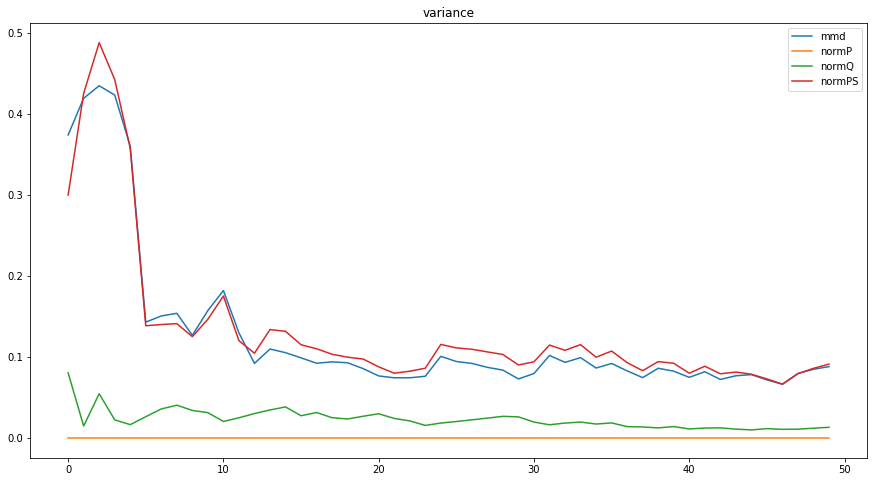

In [52]:
plt.plot(dataset[dataset["composante"]=="mmd"]["mmd"].values.reshape((10,-1)).std(axis=0),label="mmd")
plt.plot(dataset[dataset["composante"]=="normP"]["mmd"].values.reshape((10,-1)).std(axis=0),label="normP")
plt.plot(dataset[dataset["composante"]=="normQ"]["mmd"].values.reshape((10,-1)).std(axis=0),label="normQ")
plt.plot(dataset[dataset["composante"]=="PS"]["mmd"].values.reshape((10,-1)).std(axis=0),label="normPS")
plt.legend()
plt.title("variance")

In [33]:
data = pd.DataFrame(columns=["i","mmd","composante"])

n = 0
for _ in range(100):
    print(_)
    X = np.random.randn(1000).reshape((-1,1))
    Y = np.random.randn(1000).reshape((-1,1)) 
    MMD = MMD2l(X,gaussian(10))
    for i in range(0,500):
        MMD.update(Y[2*i].reshape(1,1),Y[2*i+1].reshape(1,1))
        data.loc[n] = [2*i,MMD.MMD[0],"mmd"]
        data.loc[n] = [2*i,MMD.estim_normP[0],"normP"]
        data.loc[n] = [2*i,2*MMD.sumNormQ[0]/MMD.n,"normQ"]
        data.loc[n] = [2*i,2*MMD.sumPS[0]/(MMD.n*MMD.m),"PS"]

        n += 1
sea.kdeplot(data=data[data['i']==998]['mmd'],h)


SyntaxError: positional argument follows keyword argument (<ipython-input-33-2701c41f6873>, line 17)

In [33]:
X = np.random.randn(10000).reshape((-1,1))
res = 0
L = []
for i in range(5000):
    L.append(gaussian(10)(X[2*i].reshape((-1,1)),X[2*i+1].reshape((-1,1))))
print(np.mean(L))
print(np.std(L))

0.9137013642201135
0.10679042764409259


#### Estimation of the asymptotique distribution

In [126]:
m = 1000
n = 100
repeat = 10000
Liste_mmd = []
for _ in range(repeat):
    if (_%100==0):
        print(_/repeat*100, '% achevé')
    X = np.random.randn(m).reshape((-1,1))
    Y = np.random.randn(n).reshape((-1,1))
    kernel = laplacian(2)
    MMD =  MMD2l(X,kernel)
    for i in range(0,n//2):
        MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
    Liste_mmd.append(MMD.MMD[0])


0.0 % achevé
1.0 % achevé
2.0 % achevé
3.0 % achevé
4.0 % achevé
5.0 % achevé
6.0 % achevé
7.000000000000001 % achevé
8.0 % achevé
9.0 % achevé
10.0 % achevé
11.0 % achevé
12.0 % achevé
13.0 % achevé
14.000000000000002 % achevé
15.0 % achevé
16.0 % achevé
17.0 % achevé
18.0 % achevé
19.0 % achevé
20.0 % achevé
21.0 % achevé
22.0 % achevé
23.0 % achevé
24.0 % achevé
25.0 % achevé
26.0 % achevé
27.0 % achevé
28.000000000000004 % achevé
28.999999999999996 % achevé
30.0 % achevé
31.0 % achevé
32.0 % achevé
33.0 % achevé
34.0 % achevé
35.0 % achevé
36.0 % achevé
37.0 % achevé
38.0 % achevé
39.0 % achevé
40.0 % achevé
41.0 % achevé
42.0 % achevé
43.0 % achevé
44.0 % achevé
45.0 % achevé
46.0 % achevé
47.0 % achevé
48.0 % achevé
49.0 % achevé
50.0 % achevé
51.0 % achevé
52.0 % achevé
53.0 % achevé
54.0 % achevé
55.00000000000001 % achevé
56.00000000000001 % achevé
56.99999999999999 % achevé
57.99999999999999 % achevé
59.0 % achevé
60.0 % achevé
61.0 % achevé
62.0 % achevé
63.0 % achevé
64.0 %

#### Test de normalité

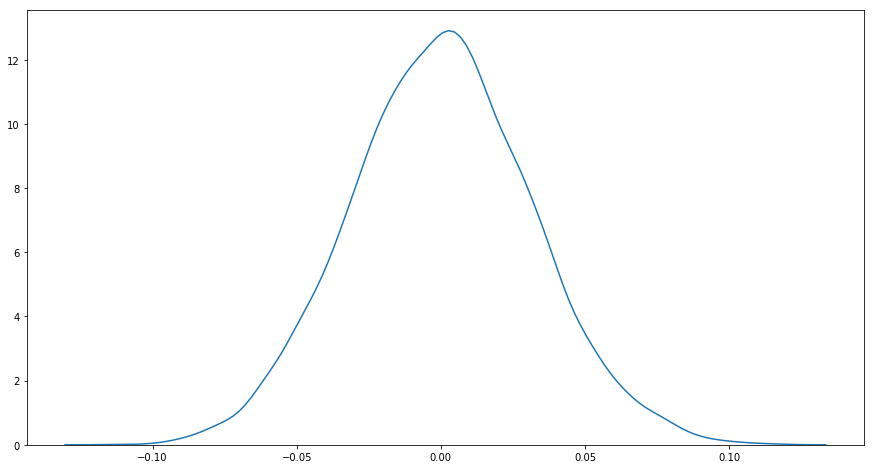

In [50]:
sea.kdeplot(Liste_mmd)

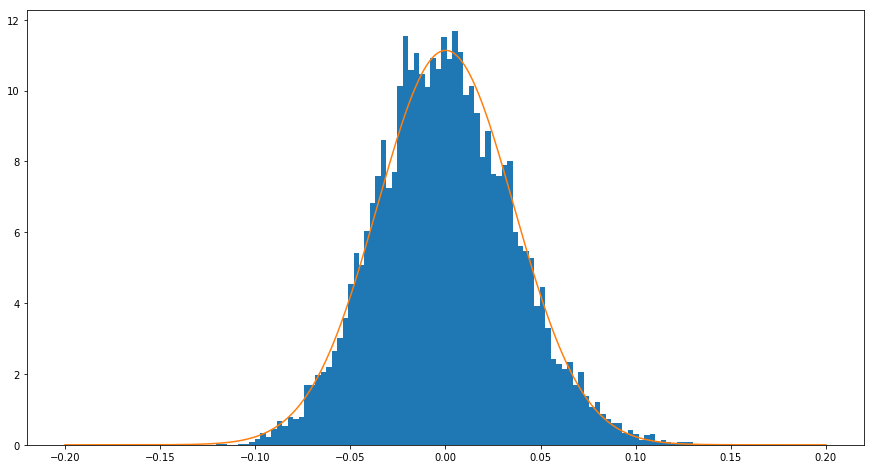

In [128]:
plt.hist(Liste_mmd,density=True,bins=100)
mean = np.mean(Liste_mmd)
std = np.std(Liste_mmd)
f_th = lambda x : 1/(np.sqrt(np.pi*2*std**2))*np.exp(-(x-mean)**2/(2*std**2))
X = np.linspace(-0.2,0.2,1000)
plt.plot(X,f_th(X))

As expected, the density function should be an gaussian function with mean = 0

0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé


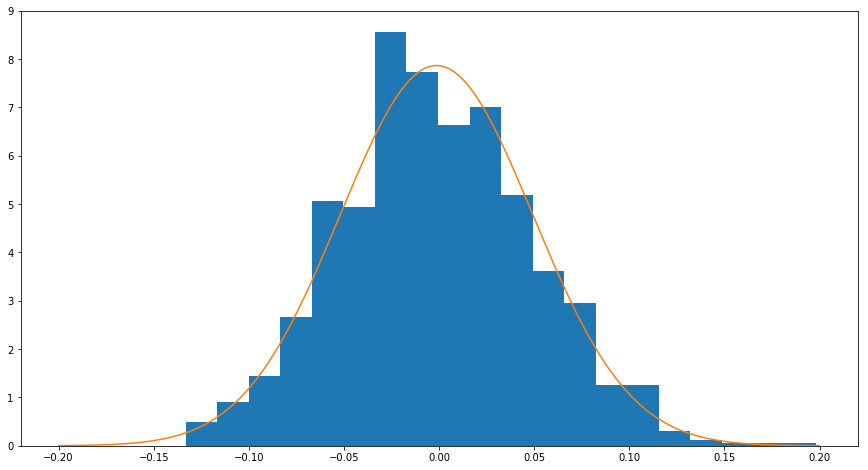

In [36]:
m = 1000
n = 50
repeat = 1000
Liste_mmd = []
for _ in range(repeat):
    if (_%100==0):
        print(_/repeat*100, '% achevé')
    X = np.random.randn(m).reshape((-1,1))
    Y = np.random.randn(n).reshape((-1,1))
    kernel = laplacian(2)
    MMD =  MMD2l(X,kernel)
    for i in range(0,n//2):
        MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
    Liste_mmd.append(MMD.MMD[0])
plt.hist(Liste_mmd,density=True,bins=20)
mean = np.mean(Liste_mmd)
std = np.std(Liste_mmd)
f_th = lambda x : 1/(np.sqrt(np.pi*2*std**2))*np.exp(-(x-mean)**2/(2*std**2))
X = np.linspace(-0.2,0.2,1000)
plt.plot(X,f_th(X))

#### Compute the variance

In [60]:
m = 1000
N = [20,50,100,200,500,1000,2000,5000]
variances = []
for n in N:
    print("******** n=", n, '************')
    repeat = 100
    Liste_mmd = []
    for _ in range(repeat):
        if (_%10==0):
            print(_/repeat*100, '% achevé')
        X = np.random.randn(m).reshape((-1,1))
        Y = np.random.randn(n).reshape((-1,1))
        kernel = gaussian(2)
        MMD =  MMD2l(X,kernel)
        for i in range(0,n//2):
            MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
        Liste_mmd.append(MMD.MMD[0])
    variances.append(np.std(Liste_mmd)**2)

******** n= 20 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 50 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 100 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 200 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 500 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 1000 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % 

In [37]:
import json
with open("variance2.json",'r') as f:
    variances = json.load(f)

In [38]:
np.q

AttributeError: module 'numpy' has no attribute 'q'

In [39]:
np.exp(-2.4)

0.09071795328941251

In [40]:
plt.plot(N,variances,'*')
#f =(1/(np.r_[N]) + 1/(m))*np.exp(-2.4)
#f =(1/(np.r_[N]) + 1/(m))*0.0756677882862886
f =(1/(np.r_[N]) + 1/(m))*0.0249356810691346
plt.plot(N,f)

NameError: name 'N' is not defined

We have as expected $Var = \left(\frac{1}{m} + \frac{1}{m}\right)v$

In [78]:
import json
with open("variance.json",'w') as f:
    json.dump(variances,f)

In [41]:
m = 100000
N = [20,50,100,200,500]
variances = []
for n in N:
    print("******** n=", n, '************')
    repeat = 100
    Liste_mmd = []
    for _ in range(repeat):
        if (_%100==0):
            print(_/repeat*100, '% achevé')
        X = np.random.randn(m).reshape((-1,1))
        Y = np.random.randn(n).reshape((-1,1))
        kernel = gaussian(2)
        MMD =  MMD2l(X,kernel)
        for i in range(0,n//2):
            MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
        Liste_mmd.append(MMD.MMD[0])
    variances.append(np.std(Liste_mmd)**2)

******** n= 20 ************
0.0 % achevé
******** n= 50 ************
0.0 % achevé
******** n= 100 ************
0.0 % achevé
******** n= 200 ************
0.0 % achevé
******** n= 500 ************
0.0 % achevé


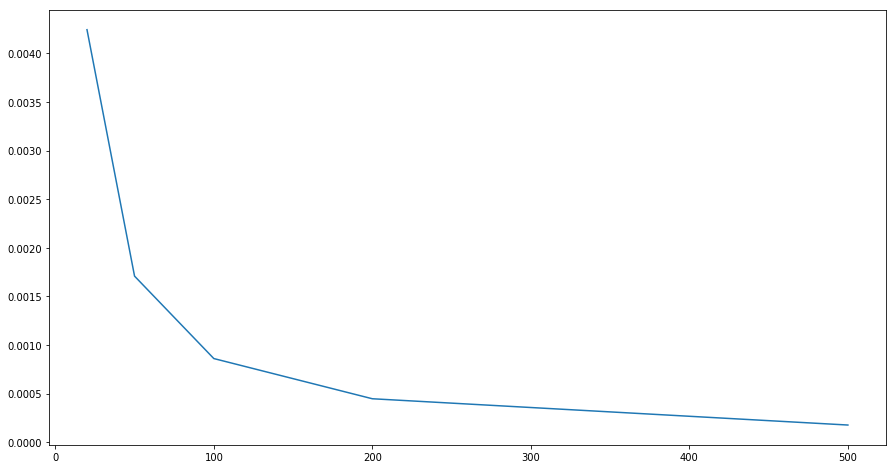

In [40]:
plt.plot(N,variances)

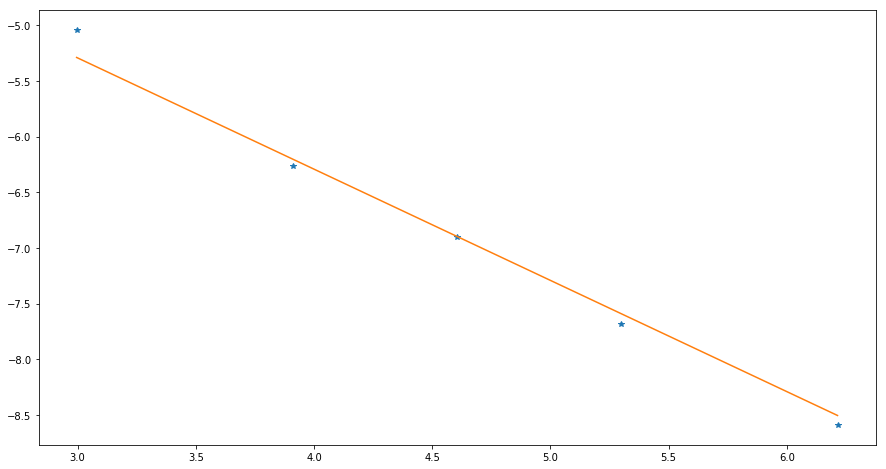

In [45]:
plt.plot(np.log(N),np.log(variances),'*')
plt.plot(np.log(N), (lambda x : -1*(x) +np.mean(np.log(N))+ np.mean(np.log(variances)))(np.log(N)))

If n<<m we have: $\frac{v}{n}$, this is conform to the theorie.

In [54]:
import json
with open("variance2.json",'w') as f:
    json.dump(variances,f)

Theorie and experiance are agree that the asymptotic law is $N(0, (\frac{1}{n}+\frac{1}{m})v)$<br>
But what is the value of $v$ ?

#### Value v

In [86]:
kernel = laplacian(0.25)
X = np.random.randn(10000).reshape(-1,1)
Y = np.random.randn(10000).reshape(-1,1)
XY = kernel(X,Y)
XY.std()**2

0.02249356810691346

In [90]:
m = 1000
N = [20,50,100,200,500,1000,2000,5000]
variances = []
for n in N:
    print("******** n=", n, '************')
    repeat = 100
    Liste_mmd = []
    for _ in range(repeat):
        if (_%10==0):
            print(_/repeat*100, '% achevé')
        X = np.random.randn(m).reshape((-1,1))
        Y = np.random.randn(n).reshape((-1,1))
        kernel = laplacian(0.25)
        MMD =  MMD2l(X,kernel)
        for i in range(0,n//2):
            MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
        Liste_mmd.append(MMD.MMD[0])
    variances.append(np.std(Liste_mmd)**2)

******** n= 20 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 50 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 100 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 200 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 500 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 1000 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % 

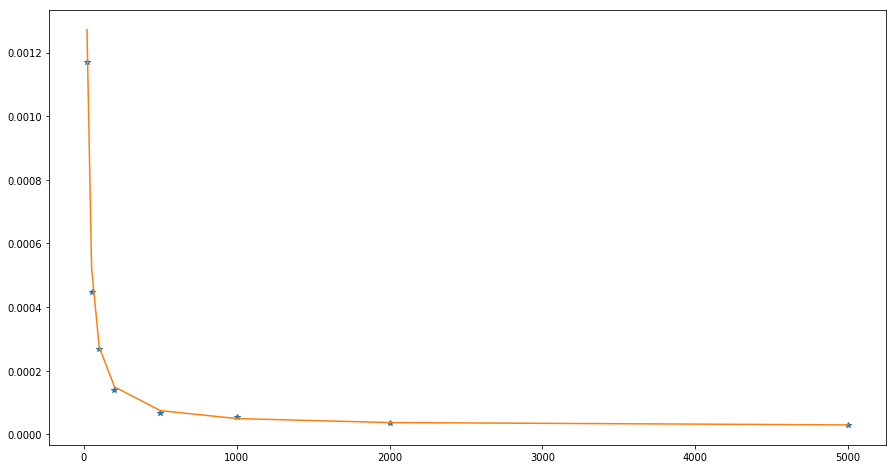

In [91]:
plt.plot(N,variances,'*')
#f =(1/(np.r_[N]) + 1/(m))*np.exp(-2.4)
#f =(1/(np.r_[N]) + 1/(m))*0.0756677882862886
f =(1/(np.r_[N]) + 1/(m))*0.0249356810691346
plt.plot(N,f)

******** n= 20 ************
******** n= 50 ************
******** n= 100 ************
******** n= 200 ************
******** n= 500 ************
******** n= 1000 ************
******** n= 2000 ************
******** n= 5000 ************


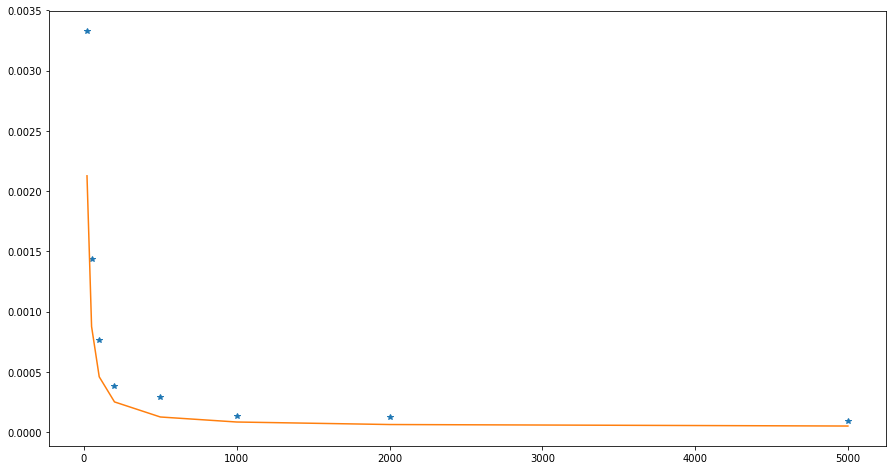

In [107]:
kernel = laplacian(5)
X = np.random.randn(10000).reshape(-1,1)
Y = np.random.randn(10000).reshape(-1,1)
XY = kernel(X,Y)
v = XY.std()**2

m = 1000
N = [20,50,100,200,500,1000,2000,5000]
variances = []
for n in N:
    print("******** n=", n, '************')
    repeat = 100
    Liste_mmd = []
    for _ in range(repeat):
        X = np.random.randn(m).reshape((-1,1))
        Y = np.random.randn(n).reshape((-1,1))
        kernel = laplacian(5)
        MMD =  MMD2l(X,kernel)
        for i in range(0,n//2):
            MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
        Liste_mmd.append(MMD.MMD[0])
    variances.append(np.std(Liste_mmd)**2)
    
    
plt.plot(N,variances,'*')
#f =(1/(np.r_[N]) + 1/(m))*np.exp(-2.4)
#f =(1/(np.r_[N]) + 1/(m))*0.0756677882862886
f =(1/(np.r_[N]) + 1/(m))*v
plt.plot(N,f)

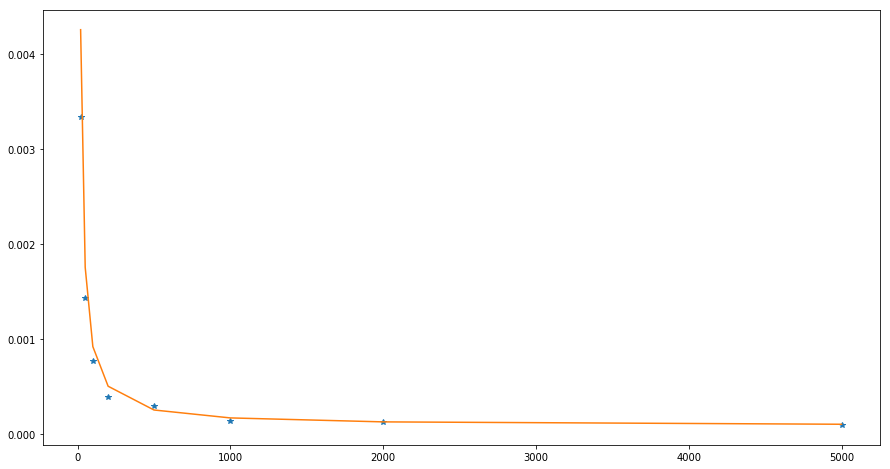

In [109]:
plt.plot(N,variances,'*')
#f =(1/(np.r_[N]) + 1/(m))*np.exp(-2.4)
#f =(1/(np.r_[N]) + 1/(m))*0.0756677882862886
f =(1/(np.r_[N]) + 1/(m))*v*2
plt.plot(N,f)

In [105]:
kernel = laplacian(5)
X = np.random.randn(10000).reshape(-1,1)
Y = np.random.randn(10000).reshape(-1,1)
XY = kernel(X,Y)
XY.std()**2

0.044171463080844554

In [46]:
kernel = gaussian(5)
X = np.random.randn(10000).reshape(-1,1)*10
Y = np.random.randn(10000).reshape(-1,1)*10
XY = kernel(X,Y)
v = XY.std()**2




m = 10000
N = [20,50,100,200,500]
variances = []
for n in N:
    print("******** n=", n, '************')
    repeat = 100
    Liste_mmd = []
    for _ in range(repeat):
        if (_%100==0):
            print(_/repeat*100, '% achevé')
        X = np.random.randn(m).reshape((-1,1))*10
        Y = np.random.randn(n).reshape((-1,1))*10
        MMD =  MMD2l(X,kernel)
        for i in range(0,n//2):
            MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
        Liste_mmd.append(MMD.MMD[0])
    variances.append(np.std(Liste_mmd)**2)
    


******** n= 20 ************
0.0 % achevé
******** n= 50 ************
0.0 % achevé
******** n= 100 ************
0.0 % achevé
******** n= 200 ************
0.0 % achevé
******** n= 500 ************
0.0 % achevé


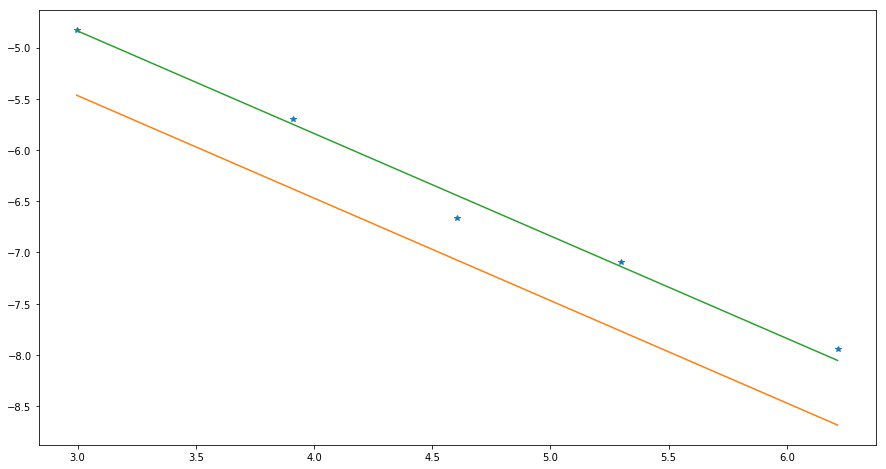

In [50]:
plt.plot(np.log(N),np.log(variances),'*')
plt.plot(np.log(N), (lambda x : -1*x+np.log(v))(np.log(N)))
plt.plot(np.log(N), (lambda x : -1*x+np.mean(np.log(variances)) + np.mean(np.log(N))  )(np.log(N)))

#### Collect more infos

In [127]:
data = pd.DataFrame(columns=["law_p","Kernel","parametre",'kernel_mean','kernel_variance','v'])

Kernel = ['gaussian','laplacian']
Ker = {}
Ker['gaussian'] = gaussian
Ker['laplacian'] = laplacian

parametre = [0.25, 0.5, 1, 2, 5]

size = [10,50,100,500,1000]

Law_p_ = ['normal_0_0', 'normal_0_10','normal_3_0','normal_3_10']
Law_p = {'normal_0_0':lambda size : np.random.randn(size).reshape(-1,1),
         'normal_0_10':lambda size : np.random.randn(size).reshape(-1,1)*sqrt(10),
         'normal_3_0':lambda size :3+ np.random.randn(size).reshape(-1,1),
         'normal_3_10':lambda size : 3+np.random.randn(size).reshape(-1,1)*sqrt(10),
}

N = [20,50,100,200,500]

ligne = 0
for law_p in Law_p:
    for kernel_ in Kernel:
        for p in parametre:
            print(ligne)
            kernel = Ker[kernel_](p)
            X = Law_p[law_p](1000)
            Y = Law_p[law_p](1000)
            XY = kernel(X,Y)
            var = XY.std()**2
            moy = XY.mean()
            m = 10000
            variances = []
            for n in N:
                repeat = 100
                Liste_mmd = []
                for _ in range(repeat):
                    X = Law_p[law_p](m)
                    Y = Law_p[law_p](n)
                    MMD =  MMD2l(X,kernel)
                    for i in range(0,n//2):
                        MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
                    Liste_mmd.append(MMD.MMD[0])
                variances.append(np.std(Liste_mmd)**2)
            v = np.exp(np.mean(np.log(variances)) + np.mean(np.log(N)))
            data.loc[ligne] = [law_p, kernel_, p, moy, var, v]
            ligne += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [128]:
data.head(40)

,law_p,Kernel,parametre,kernel_mean,kernel_variance,v
0,normal_0_0,gaussian,0.25,0.334517,0.141015,0.219478
1,normal_0_0,gaussian,0.50,0.444543,0.126288,0.192694
2,normal_0_0,gaussian,1.00,0.582841,0.113517,0.149998
3,normal_0_0,gaussian,2.00,0.704856,0.072826,0.084680
4,normal_0_0,gaussian,5.00,0.846592,0.029359,0.032390
5,normal_0_0,laplacian,0.25,0.767695,0.022057,0.027011
6,normal_0_0,laplacian,0.50,0.618939,0.050230,0.065365
7,normal_0_0,laplacian,1.00,0.409571,0.070376,0.111888
8,normal_0_0,laplacian,2.00,0.243014,0.066676,0.114984
9,normal_0_0,laplacian,5.00,0.107861,0.040066,0.079219


In [131]:
data.to_csv("comparaison_mean_var_v.csv", encoding='utf-8', index=False)  

In [102]:
x1 = data['kernel_mean'].values.reshape((-1,1))
x2 = data['kernel_variance'].values.reshape((-1,1))
X = np.hstack((np.ones(x1.shape),x1,x2,x1**2,x1*x2,x2**2,np.sqrt(x1+x2),np.sqrt(x2)))
y = data['v'].values

In [103]:
np.linalg.pinv(X).dot(y)

array([ -0.03438767,  -0.88545637,   6.05348876,   0.29014538,
        -0.56589593, -11.25540039,   0.78615991,  -1.65360397])

In [99]:
3*data['kernel_variance'] - 2*data['kernel_variance']*data['kernel_mean'] -3 *data['kernel_variance']**2

0    0.254508
1    0.225457
2    0.168521
3    0.103794
4    0.037660
5    0.031444
6    0.078638
7    0.139384
8    0.160817
9    0.118328
dtype: float64

In [51]:
kernel = gaussian(5)
X = np.random.randn(10000).reshape(-1,1)
Y = np.random.randn(10000).reshape(-1,1)
XY = kernel(X,Y)
v = XY.std()**2




m = 10000
N = [20,50,100,200,500]
variances = []
for n in N:
    print("******** n=", n, '************')
    repeat = 100
    Liste_mmd = []
    for _ in range(repeat):
        if (_%10==0):
            print(_/repeat*100, '% achevé', end="\r",flush=True)
        X = np.random.randn(m).reshape((-1,1))
        Y = np.random.randn(n).reshape((-1,1))
        MMD =  MMD2l(X,kernel)
        for i in range(0,n//2):
            MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
        Liste_mmd.append(MMD.MMD[0])
    variances.append(np.std(Liste_mmd)**2)

******** n= 20 ************
******** n= 50 ************
******** n= 100 ************
******** n= 200 ************
******** n= 500 ************


In [106]:
v

0.0870209743460864

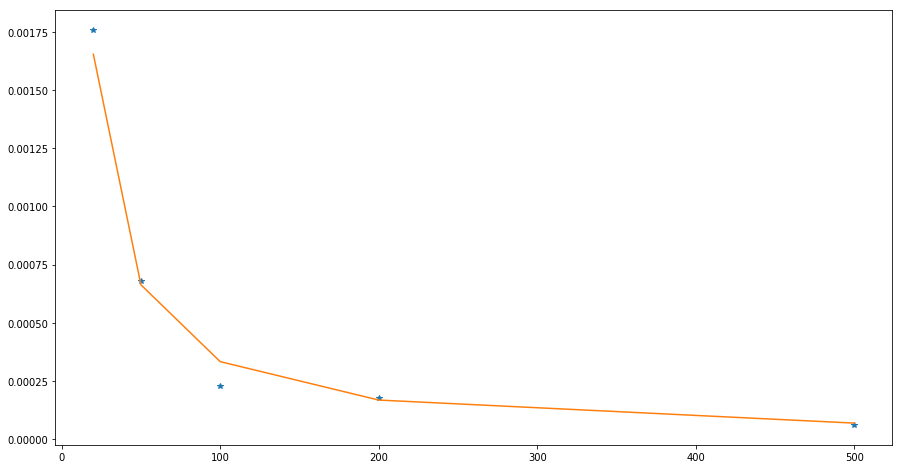

In [123]:
plt.plot(N,variances,'*')
#f =(1/(np.r_[N]) + 1/(m))*np.exp(-2.4)
#f =(1/(np.r_[N]) + 1/(m))*0.0756677882862886
f =(1/(np.r_[N]) + 1/(m))*0.032998
plt.plot(N,f)

In [120]:
np.exp(np.mean(np.log(variances)) + np.mean(np.log(N)))

0.23404047833696642

#### Recherche de deux noyaux de même E et V

In [84]:
kernel = gaussian(5)
X = np.random.randn(10000).reshape(-1,1)
Y = np.random.randn(10000).reshape(-1,1)
XY = kernel(X,Y)
print(XY.mean())
print(XY.std()**2)

kernel = laplacian(0.0001)
X = np.random.randn(10000).reshape(-1,1)*1500
Y = np.random.randn(10000).reshape(-1,1)*1500
XY = kernel(X,Y)
print(XY.mean())
print(XY.std()**2)

0.8419344317765035
0.032039135702264354
0.8508256302975624
0.010642365602790823


In [109]:
kernel = gaussian(5)
m = 10000
N = [20,50,100,200,500]
variances = []
for n in N:
    print("******** n=", n, '************')
    repeat = 100
    Liste_mmd = []
    for _ in range(repeat):
        if (_%100==0):
            print(_/repeat*100, '% achevé')
        X = np.random.randn(m).reshape((-1,1))
        Y = np.random.randn(n).reshape((-1,1))
        MMD =  MMD2l(X,kernel)
        for i in range(0,n//2):
            MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
        Liste_mmd.append(MMD.MMD[0])
    variances.append(np.std(Liste_mmd)**2)
v = np.exp(np.mean(np.log(variances)) + np.mean(np.log(N)))
print(v)


kernel = laplacian(100)
m = 10000
N = [20,50,100,200,500]
variances = []
for n in N:
    print("******** n=", n, '************')
    repeat = 100
    Liste_mmd = []
    for _ in range(repeat):
        if (_%100==0):
            print(_/repeat*100, '% achevé')
        X = np.random.randn(m).reshape((-1,1))*.0015
        Y = np.random.randn(n).reshape((-1,1))*.0015
        MMD =  MMD2l(X,kernel)
        for i in range(0,n//2):
            MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
        Liste_mmd.append(MMD.MMD[0])
    variances.append(np.std(Liste_mmd)**2)
v = np.exp(np.mean(np.log(variances)) + np.mean(np.log(N)))
print(v)

******** n= 20 ************
0.0 % achevé
******** n= 50 ************
0.0 % achevé
******** n= 100 ************
0.0 % achevé
******** n= 200 ************
0.0 % achevé
******** n= 500 ************
0.0 % achevé
0.03301235301815239
******** n= 20 ************
0.0 % achevé
******** n= 50 ************
0.0 % achevé
******** n= 100 ************
0.0 % achevé
******** n= 200 ************
0.0 % achevé
******** n= 500 ************
0.0 % achevé
0.009753071399932759


#### Estimateur qui fonctionne

In [13]:
def h_std_estimator(X,kernel, nb_turn = 100):
    x = X[:X.shape[0]//2,:]
    y = X[X.shape[0]//2:,:]
    indices = np.arange(0,X.shape[0]//2,2)
    h_list = []
    for _ in range(nb_turn):
        i = np.random.choice(indices, size = 1, replace=True)
        h_list.append(kernel(x[i],x[i+1]) + kernel(y[i],y[i+1]) - kernel(y[i],x[i+1]) - kernel(x[i],y[i+1]))
    return np.std(h_list)**2

In [47]:
import time as time
for i in range(100):
    clear_output()
    print(i,end='\r',flush=True)


In [22]:
def h_std_estimator(law_p,kernel, nb_turn = 10000):
    h_list = []
    for _ in range(nb_turn):
        X = law_p(4)
        x1, x2, y1, y2 = X[0].reshape((1,1)), X[1].reshape((1,1)), X[2].reshape((1,1)), X[3].reshape((1,1))
        h_list.append(kernel(x1,x2) + kernel(y1,y2)  - kernel(y1,x2) - kernel(x1,y2))
    return np.std(h_list)**2

def h_std_estimator_2(law_p,kernel, nb_turn = 10000):
    h_list = []
    for _ in range(nb_turn):
        X = law_p(4)
        x1, x2, y1, y2 = X[0].reshape((1,1)), X[1].reshape((1,1)), X[2].reshape((1,1)), X[3].reshape((1,1))
        h_list.append(kernel(x1,x2) )
    return np.std(h_list)**2

kernel = laplacian(100)
law_p = lambda size : np.random.randn(size).reshape(-1,1)*.0015
print(h_std_estimator(law_p,kernel)/h_std_estimator_2(law_p,kernel))
#print(h_std_estimator_2(law_p,kernel))

kernel = gaussian(5)
law_p = lambda size : np.random.randn(size).reshape(-1,1)
print(h_std_estimator(law_p,kernel)/h_std_estimator_2(law_p,kernel))
#print(h_std_estimator_2(law_p,kernel))

kernel = gaussian(0.25)
law_p = lambda size : np.random.randn(size).reshape(-1,1)
print(h_std_estimator(law_p,kernel)/h_std_estimator_2(law_p,kernel))
#print(h_std_estimator_2(law_p,kernel))


2.3043095890670267
2.117702562066335
3.182261406821495


In [135]:
data = pd.DataFrame(columns=["law_p","Kernel","parametre",'var_hk'])

Kernel = ['gaussian','laplacian']
Ker = {}
Ker['gaussian'] = gaussian
Ker['laplacian'] = laplacian

parametre = [0.25, 0.5, 1, 2, 5]

size = [10,50,100,500,1000]

Law_p_ = ['normal_0_0', 'normal_0_10','normal_3_0','normal_3_10']
Law_p = {'normal_0_0':lambda size : np.random.randn(size).reshape(-1,1),
         'normal_0_10':lambda size : np.random.randn(size).reshape(-1,1)*sqrt(10),
         'normal_3_0':lambda size :3+ np.random.randn(size).reshape(-1,1),
         'normal_3_10':lambda size : 3+np.random.randn(size).reshape(-1,1)*sqrt(10),
}

N = [20,50,100,200,500]

ligne = 0
for law_p in Law_p:
    for kernel_ in Kernel:
        for p in parametre:
            kernel = Ker[kernel_](p)
            law = Law_p[law_p]
            data.loc[ligne] = [law_p, kernel_, p, h_std_estimator(law,kernel)/2]
            ligne += 1
            print(ligne)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [136]:
data.head()

,law_p,Kernel,parametre,var_hk
0,normal_0_0,gaussian,0.25,0.212526
1,normal_0_0,gaussian,0.50,0.190799
2,normal_0_0,gaussian,1.00,0.147943
3,normal_0_0,gaussian,2.00,0.087001
4,normal_0_0,gaussian,5.00,0.033091


In [117]:
data.to_csv("comparaison_hk_var.csv", encoding='utf-8', index=False)  

In [118]:
data2 = pd.read_csv("comparaison_mean_var_v.csv")

In [122]:
data['var_hk']

0     0.219265
1     0.231447
2     0.138741
3     0.090749
4     0.037118
5     0.032468
6     0.071047
7     0.105251
8     0.111821
9     0.100475
10    0.135423
11    0.161023
12    0.161297
13    0.200635
14    0.168667
15    0.112952
16    0.123535
17    0.117812
18    0.060994
19    0.026868
20    0.177263
21    0.188358
22    0.149041
23    0.094987
24    0.034878
25    0.020558
26    0.057076
27    0.101059
28    0.118429
29    0.093562
30    0.122810
31    0.139619
32    0.220379
33    0.206128
34    0.185701
35    0.095506
36    0.119977
37    0.108486
38    0.062501
39    0.030832
Name: var_hk, dtype: float64

In [138]:
(data2['v'] - data['var_hk'])/data2['v'] * 100

0      3.167570
1      0.983895
2      1.369643
3     -2.741500
4     -2.164244
5      2.190544
6      6.088708
7      7.171705
8     -0.822415
9     -5.553351
10   -15.174594
11    -0.205766
12    -3.136332
13    -1.449302
14    -7.277047
15    -6.827147
16     6.210610
17     2.291540
18     5.985109
19     2.335853
20    -3.378005
21     4.914276
22     1.253557
23    -9.253625
24    -2.160638
25     9.021927
26    -5.199619
27    -4.186660
28     3.501424
29     2.846224
30    11.780874
31     9.938600
32    -4.668293
33     8.914730
34     6.582848
35     6.721918
36     0.388341
37    -6.601300
38    12.156849
39     4.338955
dtype: float64

******** n= 20 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 50 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 100 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 200 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé
******** n= 500 ************
0.0 % achevé
10.0 % achevé
20.0 % achevé
30.0 % achevé
40.0 % achevé
50.0 % achevé
60.0 % achevé
70.0 % achevé
80.0 % achevé
90.0 % achevé


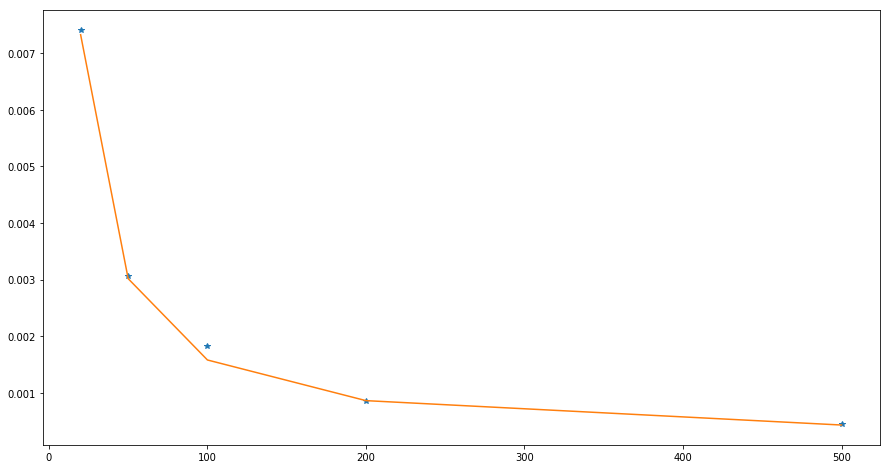

In [40]:
kernel = gaussian(1)
law_p = lambda size : np.random.randn(size).reshape(-1,1)
v = h_std_estimator(law_p,kernel)/2




m = 1000
N = [20,50,100,200,500]
variances = []
for n in N:
    print("******** n=", n, '************')
    repeat = 1000
    Liste_mmd = []
    for _ in range(repeat):
        if (_%100==0):
            print(_/repeat*100, '% achevé')
        X = np.random.randn(m).reshape((-1,1))
        Y = np.random.randn(n).reshape((-1,1))
        MMD =  MMD2l(X,kernel)
        for i in range(0,n//2):
            MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
        Liste_mmd.append(MMD.MMD[0])
    variances.append(np.std(Liste_mmd)**2)
    
plt.plot(N,variances,'*')
#f =(1/(np.r_[N]) + 1/(m))*np.exp(-2.4)
#f =(1/(np.r_[N]) + 1/(m))*0.0756677882862886
f =(1/(np.r_[N]) + 1/(m))*v
plt.plot(N,f)

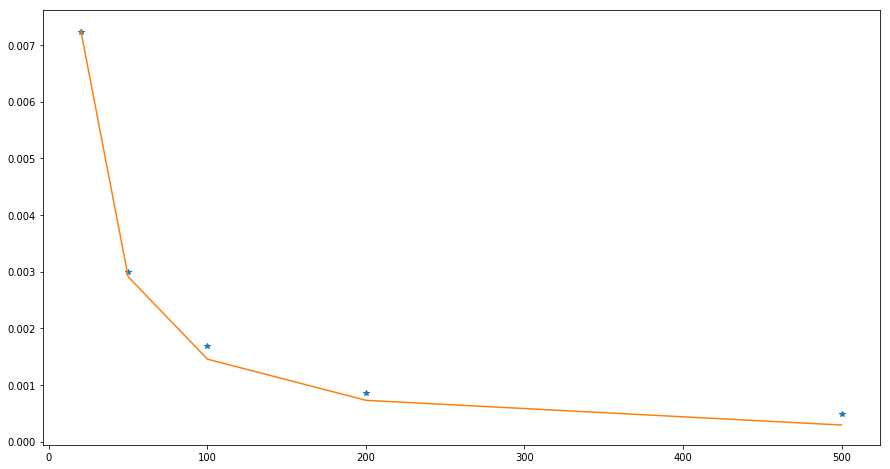

In [145]:
plt.plot(N,variances,'*')
#f =(1/(np.r_[N]) + 1/(m))*np.exp(-2.4)
#f =(1/(np.r_[N]) + 1/(m))*0.0756677882862886
f =(1/(np.r_[N]))*v
plt.plot(N,f)

L'estimateur de la MMD linéaire semble s'adapter aussi à notre problème

En conclusion, la loi asymptotique sous l'hypothèse H0 serait :<br>
$N(0, (\frac{1}{n}+\frac{1}{m})\frac{\sigma_k^2}{2})$

In [149]:
std

0.049830737390888495

In [45]:
m = 10000
n = 500
repeat = 10000
Liste_mmd = []
for _ in range(repeat):
    if (_%100==0):
        print(_/repeat*100, '% achevé')
    X = np.random.randn(m).reshape((-1,1))
    Y = np.random.randn(n).reshape((-1,1))
    kernel = laplacian(2)
    MMD =  MMD2l(X,kernel)
    for i in range(0,n//2):
        MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
    Liste_mmd.append(MMD.MMD[0])
plt.hist(Liste_mmd,density=True,bins=50)
law_p = lambda size : np.random.randn(size).reshape(-1,1)
std = np.sqrt((1/m + 1/n)*h_std_estimator(law_p,kernel)/2)
f_th = lambda x : 1/(np.sqrt(np.pi*2*std**2))*np.exp(-(x)**2/(2*std**2))
X = np.linspace(-0.2,0.2,1000)
plt.plot(X,f_th(X))
plt.show()

0.0 % achevé


KeyboardInterrupt: 

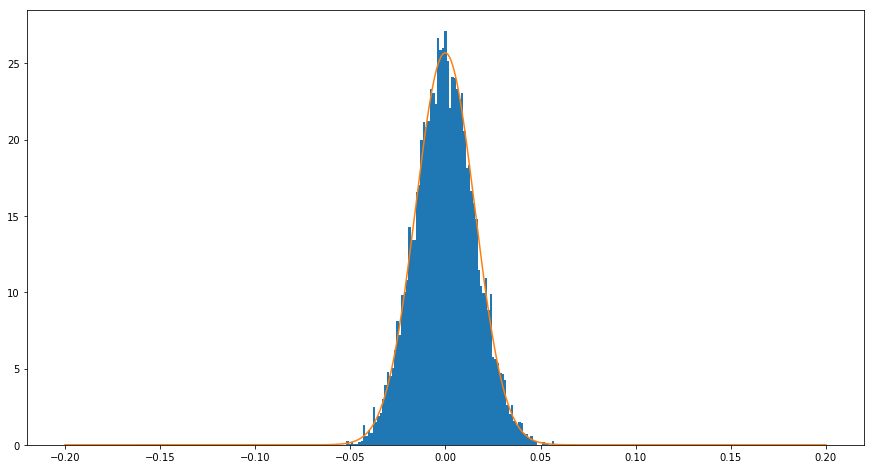

In [165]:
plt.hist(Liste_mmd,density=True,bins=100)
plt.plot(X,f_th(X-np.mean(Liste_mmd)))
plt.show()

In [169]:
np.mean(Liste_mmd)

-0.0001478969928430728

In [170]:
std

0.01552854051459245

In [171]:
np.std(Liste_mmd)

0.01574246362986622

### Comparaisons lois MMDl

0.0 % achevé
1.0 % achevé
2.0 % achevé
3.0 % achevé
4.0 % achevé
5.0 % achevé
6.0 % achevé
7.000000000000001 % achevé
8.0 % achevé
9.0 % achevé
10.0 % achevé
11.0 % achevé
12.0 % achevé
13.0 % achevé
14.000000000000002 % achevé
15.0 % achevé
16.0 % achevé
17.0 % achevé
18.0 % achevé
19.0 % achevé
20.0 % achevé
21.0 % achevé
22.0 % achevé
23.0 % achevé
24.0 % achevé
25.0 % achevé
26.0 % achevé
27.0 % achevé
28.000000000000004 % achevé
28.999999999999996 % achevé
30.0 % achevé
31.0 % achevé
32.0 % achevé
33.0 % achevé
34.0 % achevé
35.0 % achevé
36.0 % achevé
37.0 % achevé
38.0 % achevé
39.0 % achevé
40.0 % achevé
41.0 % achevé
42.0 % achevé
43.0 % achevé
44.0 % achevé
45.0 % achevé
46.0 % achevé
47.0 % achevé
48.0 % achevé
49.0 % achevé
50.0 % achevé
51.0 % achevé
52.0 % achevé
53.0 % achevé
54.0 % achevé
55.00000000000001 % achevé
56.00000000000001 % achevé
56.99999999999999 % achevé
57.99999999999999 % achevé
59.0 % achevé
60.0 % achevé
61.0 % achevé
62.0 % achevé
63.0 % achevé
64.0 %

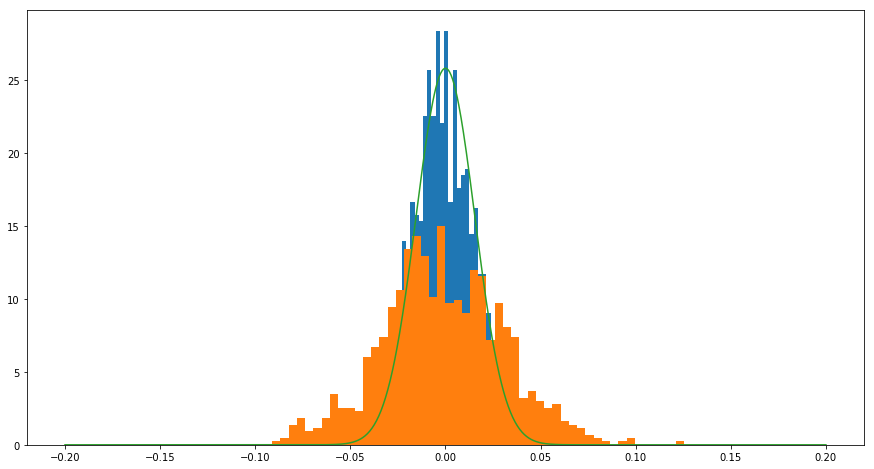

In [76]:
m = 10000
n = 500
repeat = 1000
Liste_mmd = []
Liste_mmdl = []
for _ in range(repeat):
    if (_%10==0):
        print(_/repeat*100, '% achevé')
    X = np.random.randn(m).reshape((-1,1))
    Y = np.random.randn(n).reshape((-1,1))
    kernel = laplacian(2)
    
    MMD =  MMD2l(X,kernel)
    for i in range(0,n//2):
        MMD.update(Y[2*i].reshape((-1,1)),Y[2*i+1].reshape((-1,1)))
    Liste_mmd.append(MMD.MMD[0])
    
    
    Liste_mmdl.append(MMDl(X[:n],Y[:n],kernel))
    
plt.hist(Liste_mmd,density=True,bins=50)
plt.hist(Liste_mmdl,density=True,bins=50)

law_p = lambda size : np.random.randn(size).reshape(-1,1)
std = np.sqrt((1/m + 1/n)*h_std_estimator(law_p,kernel)/2)
f_th = lambda x : 1/(np.sqrt(np.pi*2*std**2))*np.exp(-(x)**2/(2*std**2))
X = np.linspace(-0.2,0.2,1000)
plt.plot(X,f_th(X))
plt.show()

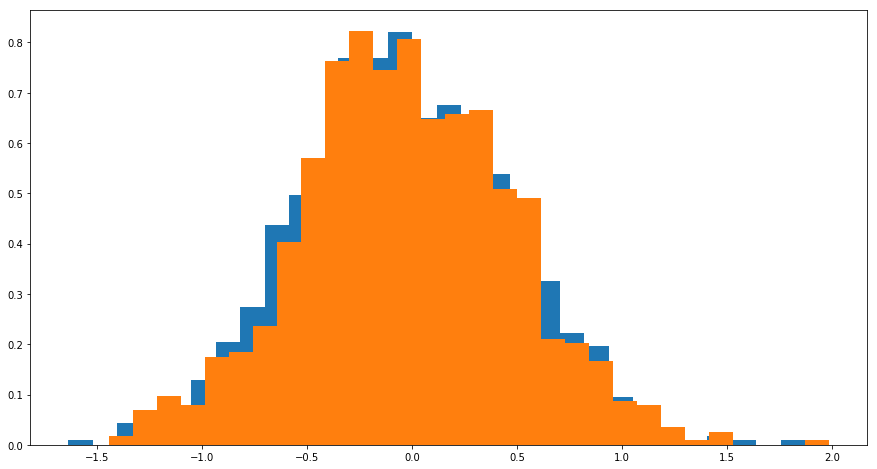

In [80]:
plt.hist(np.array(Liste_mmd)/(np.sqrt((2/n)/4)),density=True,bins=30)
plt.hist(np.array(Liste_mmdl)/(np.sqrt(2*(1/n))),density=True,bins=30);

#### Test estimateur alternatif

In [14]:
def estimateur_moyenne_partielle(kernel, law_p, x, repeat=100):
    X = law_p(repeat)
    return np.mean(kernel(x, X))

In [15]:
kernel = gaussian(0.25)
law_p = lambda size : np.random.randn(size).reshape(-1,1) 
estimateur_moyenne_partielle(kernel, law_p, 0)

0.45970620054524075

In [16]:
def estimateur_moyenne(kernel, law_p, repeat = 100):
    X = law_p(repeat)
    Y = law_p(repeat)
    XX, YY = np.meshgrid(X,Y)
    X_in = XX.reshape((-1,1))
    Y_in = YY.reshape((-1,1))
    return np.mean(kernel(X_in, Y_in))

In [57]:
kernel = laplacian(1)
law_p = lambda size : np.random.randn(size).reshape(-1,1) 
estimateur_moyenne(kernel, law_p)

0.43155033095895834

In [18]:
### Comparaison avec la moyenne de la moyenne
L = []
Y = law_p(100)
for i in range(100):
    L.append(estimateur_moyenne_partielle(kernel, law_p, Y[i]))
print(np.mean(L))

0.5785322867752875


In [62]:
### Générateur du Produit scalaire centré
def gen_PNC(kernel, law_p, size=1000):
    L = []
    for i in range(size):
        x = law_p(2)
        x1,x2 = x[0],x[1]
        gen = (kernel(np.r_[x1].reshape((1,1)),np.r_[x2].reshape((1,1))) 
               - estimateur_moyenne_partielle(kernel, law_p, x1) 
               - estimateur_moyenne_partielle(kernel, law_p, x2) 
               + estimateur_moyenne(kernel, law_p))
        L.append(gen)
    return L

In [20]:
L = gen_PNC(kernel, law_p);

In [58]:
h_std_estimator(law_p,kernel)/2

0.10260603069333821

In [59]:
L = gen_PNC(kernel, law_p);
L = np.r_[L]
L.std()**2*2

0.10704058728210866

In [45]:
### Comparaison avec la moyenne de la moyenne
L = []
Y = law_p(1000)
for i in range(1000):
    L.append(estimateur_moyenne_partielle(kernel, law_p, Y[i])**2)
print(np.mean(L)-estimateur_moyenne(kernel, law_p)**2)

0.01322099879542979


In [63]:
data = pd.DataFrame(columns=["law_p","Kernel","parametre",'var_PNC'])

Kernel = ['gaussian','laplacian']
Ker = {}
Ker['gaussian'] = gaussian
Ker['laplacian'] = laplacian

parametre = [0.25, 0.5, 1, 2, 5]

size = [10,50,100,500,1000]

Law_p_ = ['normal_0_0', 'normal_0_10','normal_3_0','normal_3_10']
Law_p = {'normal_0_0':lambda size : np.random.randn(size).reshape(-1,1),
         'normal_0_10':lambda size : np.random.randn(size).reshape(-1,1)*sqrt(10),
         'normal_3_0':lambda size :3+ np.random.randn(size).reshape(-1,1),
         'normal_3_10':lambda size : 3+np.random.randn(size).reshape(-1,1)*sqrt(10),
}

N = [20,50,100,200,500]

ligne = 0
for law_p in Law_p:
    for kernel_ in Kernel:
        for p in parametre:
            kernel = Ker[kernel_](p)
            law = Law_p[law_p]
            L = gen_PNC(kernel, law);
            L = np.r_[L]
            data.loc[ligne] = [law_p, kernel_, p, L.std()**2*2]
            ligne += 1
            print(ligne,end='\r',flush=True)
data.to_csv("comparaison_PNC_var.csv", encoding='utf-8', index=False)  

As expected with mathematical proof, the PNC is a good estimator of v.

## Références

GRETTON, Arthur, SEJDINOVIC, Dino, STRATHMANN, Heiko, et al. Optimal kernel choice for large-scale two-sample tests. In : Advances in neural information processing systems. 2012. p. 1205-1213

Sriperumbudur, B. K., Gretton, A., Fukumizu, K., Schölkopf, B., & Lanckriet, G. R. (2010). Hilbert space embeddings and metrics on probability measures. Journal of Machine Learning Research, 11(Apr), 1517-1561.